In [ ]:
#Data Visuals
#3/13/25
#Diya Tandel

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(pd)

<module 'pandas' from '/opt/anaconda3/lib/python3.12/site-packages/pandas/__init__.py'>


In [14]:
data2 = pd.read_csv('theCombinedData.csv')
pd.read_csv('theCombinedData.csv')

,Month,Year,AQI(Median),Total Ridership(Median)
0,January,2019,41.0,"1,396,540"
1,February,2019,36.0,"1,462,630"
2,March,2019,39.0,"1,500,660"
3,April,2019,43.5,"1,525,050"
4,May,2019,41.0,"1,507,300"
5,June,2019,44.5,"1,527,750"
6,July,2019,43.0,"1,503,690"
7,August,2019,37.0,"1,526,830"
8,September,2019,30.5,"1,569,180"
9,October,2019,52.0,"1,570,340"


In [16]:
print(data2.columns)

Index(['Month', 'Year', 'AQI(Median)', 'Total Ridership(Median)'], dtype='object')


<Axes: xlabel='AQI(Median)', ylabel='Total Ridership(Median)'>

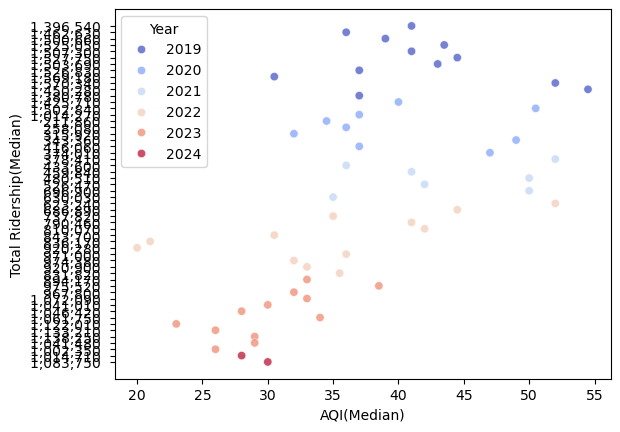

In [18]:
sns.scatterplot(x=data2["AQI(Median)"], y=data2["Total Ridership(Median)"], hue=data2["Year"], palette="coolwarm", alpha=0.7)

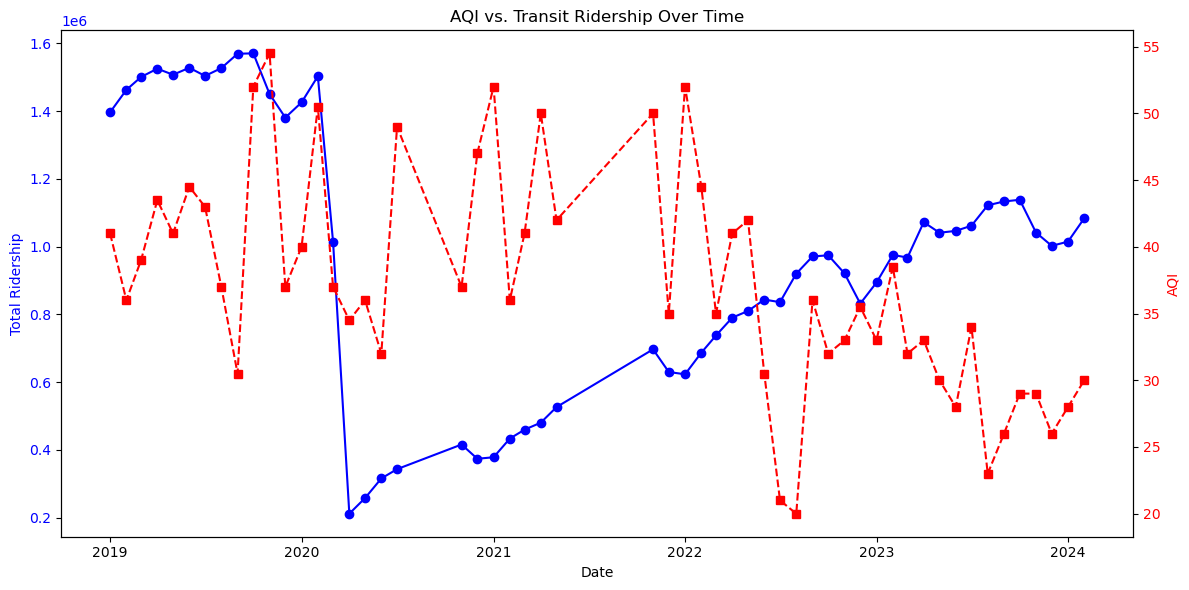

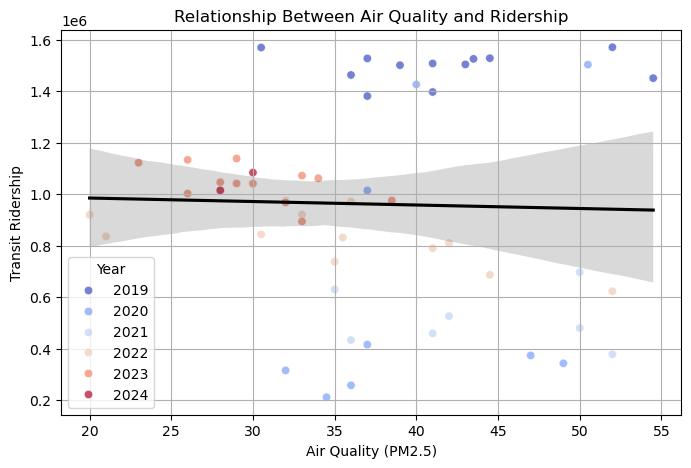

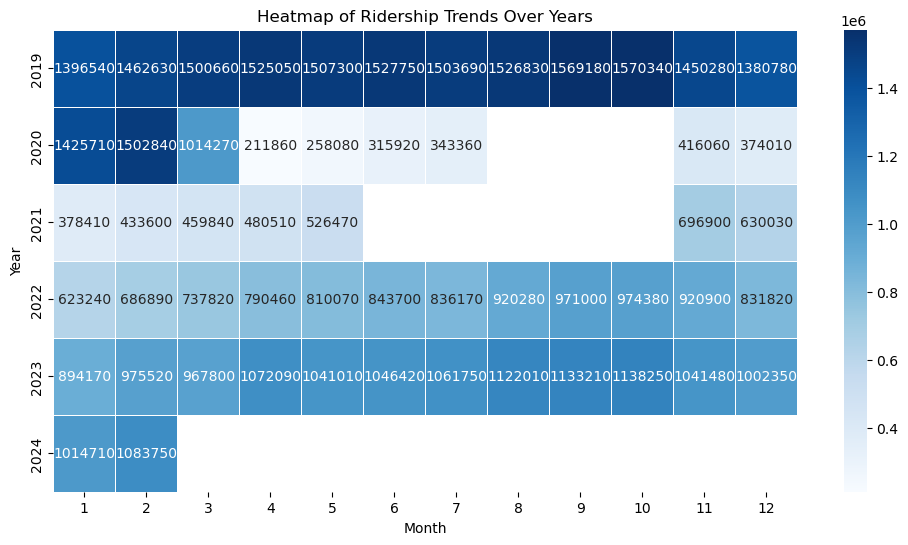

In [20]:

data2 = pd.read_csv("theCombinedData.csv")

data2.columns = data2.columns.str.strip()


month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}
data2["month"] = data2["Month"].map(month_mapping)

data2["Total Ridership(Median)"] = data2["Total Ridership(Median)"].str.replace(",", "").astype(float)

data2["AQI(Median)"] = pd.to_numeric(data2["AQI(Median)"], errors='coerce')

data2["date"] = pd.to_datetime(data2["Year"].astype(str) + "-" + data2["month"].astype(str), format="%Y-%m")

data2 = data2.sort_values("date")

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel("Date")
ax1.set_ylabel("Total Ridership", color="b")
ax1.plot(data2["date"], data2["Total Ridership(Median)"], marker="o", color="b", label="Total Ridership")
ax1.tick_params(axis="y", labelcolor="b")

ax2 = ax1.twinx()
ax2.set_ylabel("AQI", color="r")
ax2.plot(data2["date"], data2["AQI(Median)"], marker="s", linestyle="dashed", color="r", label="AQI")
ax2.tick_params(axis="y", labelcolor="r")


plt.title("AQI vs. Transit Ridership Over Time")
fig.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data2["AQI(Median)"], y=data2["Total Ridership(Median)"], hue=data2["Year"], palette="coolwarm", alpha=0.7)


sns.regplot(x=data2["AQI(Median)"], y=data2["Total Ridership(Median)"], scatter=False, color="black")

plt.xlabel("Air Quality (PM2.5)")
plt.ylabel("Transit Ridership")
plt.title("Relationship Between Air Quality and Ridership")
plt.grid(True)
plt.show()

pivot_ridership = data2.pivot(index="Year", columns="month", values="Total Ridership(Median)")
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_ridership, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)

plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Heatmap of Ridership Trends Over Years")
plt.show()

In [24]:
coeffiecients = np.polyfit(data2["Total Ridership(Median)"], data2["AQI(Median)"], 1)
y_pred = np.polyval(coeffiecients, data2["Total Ridership(Median)"])

ss_t = np.sum((data2["AQI(Median)"]-np.mean(data2["AQI(Median)"]))**2)
ss_residual = np.sum((data2["AQI(Median)"]-y_pred)**2)
r2 = 1 - (ss_residual/ ss_t)

print(r2)

0.0008000507069355622


In [30]:
np.sqrt(r2)

0.028285167613708112